## Nonlinear Sample (Example 2)

---

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from math import *
from scipy import integrate
sym.init_printing()

We have the second system of following form:
$$
x'=-x^{3}
$$
Normally, we have the following quadratization, where $y=x^2$:
$$
y' = -2x x' = -2x^4 = -2y^2
$$
Then we have the following system:
$$
\begin{cases}
y' = -2y^2\\
x' = -xy
\end{cases}
$$
However, we can see that **there is no linear part**, we can change $y=x^2+a \Rightarrow a = y - x^{2}$, then we have the following system:
$$
x' = -x^{3} = -x(y-a) = -xy +ax
$$
$$
\begin{aligned}
y' &= 2xx' = 2x(-x^3) - 2x^{4} \\
&= -2(y-a)^{2} = -2y^{2} _ 4ay - 2a^{2} \\
&= -2y^{2} + 4ay - 2a(y-x^{2})\\
&= -2y^{2} + 4ay - 2ax^{2} - 2ay \\
&= -2y^{2} + 2ax^{2} +2ay 
\end{aligned}
$$
Then we can finalize the system as following:
$$
\begin{cases}
y' = -2y^2\ + 2ax^{2} + 2ay\\
x' = -xy + ax
\end{cases}
$$

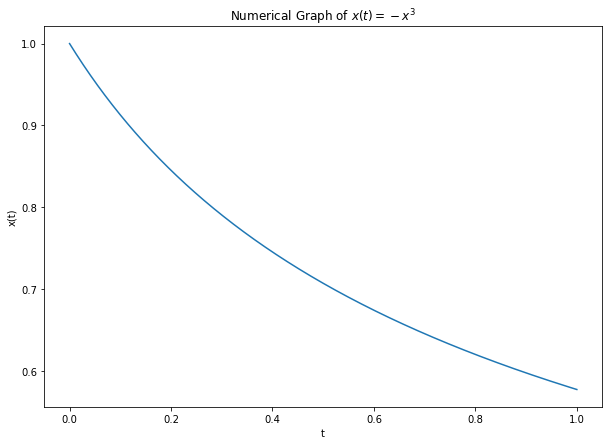

In [102]:
def dx_dt(x, t):  # 定义函数 f(y,t)
    return - x ** 3
  
x0 = 1.0  # initial condition
t = np.linspace(0, 1, 1000)  
x = integrate.odeint(dx_dt, x0, t)  # numerical solution

plt.figure(figsize=(10, 7))
plt.plot(t, x)  
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Numerical Graph of $x(t) = -x^3$')
plt.show() 

d            3   
──(x(t)) = -x (t)
dt               

⎡               ________                 ________⎤
⎢              ╱  -1                    ╱  -1    ⎥
⎢       -√2⋅  ╱  ──────           √2⋅  ╱  ────── ⎥
⎢           ╲╱   C₁ - t              ╲╱   C₁ - t ⎥
⎢x(t) = ─────────────────, x(t) = ───────────────⎥
⎣               2                        2       ⎦

----------------- The first equation (right hands) -----------------


        ________ 
       ╱  -1     
-√2⋅  ╱  ──────  
    ╲╱   C₁ - t  
─────────────────
        2        

----------------- The second equation (right hands) -----------------


       ________
      ╱  -1    
√2⋅  ╱  ────── 
   ╲╱   C₁ - t 
───────────────
       2       

       _______
      ╱  -1   
√2⋅  ╱  ───── 
   ╲╱   1 - t 
──────────────
      2       

<lambdifygenerated-57>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/2)*sqrt(2)*sqrt(-1/(1 - t))
<lambdifygenerated-57>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*sqrt(-1/(1 - t))


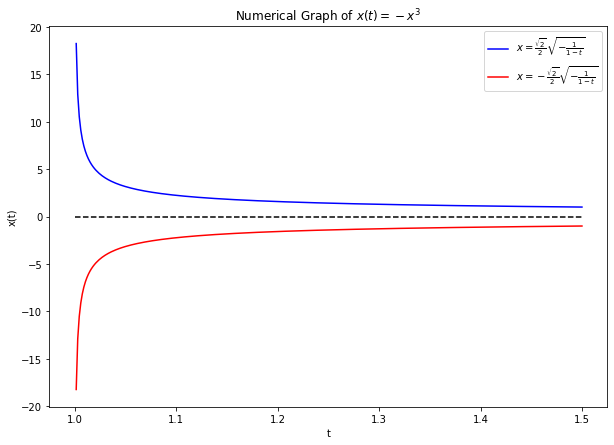

In [103]:
t = sym.Symbol('t')
x = sym.Function('x')(t)

# Define the system of ODEs
eq1 = sym.Eq(x.diff(t), -x**3)
display(eq1)
sol = sym.dsolve(eq1)

display(sol)
print('----------------- The first equation (right hands) -----------------')
display(sol[0].rhs)
print('----------------- The second equation (right hands) -----------------')
display(sol[1].rhs)

# plot the solution
expr = sol[1].rhs
C1 = sym.Symbol('C1')
expr_init = expr.subs(C1, 1)
display(expr_init)

# convert the expression to a function that can be used with numpy arrays
expr_init_func = sym.lambdify(t, expr_init, 'numpy')

# plot the graph of expr_init
t_vals = np.linspace(0, 1.5, 1000)
x_vals = expr_init_func(t_vals)

plt.figure(figsize=(10, 7))
plt.title(r'Numerical Graph of $x(t) = -x^3$')
plt.plot(t_vals, x_vals, 'b-', label=r'$x = \frac{\sqrt{2}}{2} \sqrt{-\frac{1}{1-t}}$')
plt.plot(t_vals, -x_vals, 'r-', label=r'$x = - \frac{\sqrt{2}}{2} \sqrt{-\frac{1}{1-t}}$')
plt.plot([1.0, 1.5], [0, 0], 'k--')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc='best')
plt.show()

### Solving the equation $x' = -x^{3}$

---

We can solve it by seperating the variables, then we have the following equation:
$$
x'(t) = -x(t)^3
$$
divided by $x(t)^3$, we have:
$$
\frac{1}{x(t)^3} \frac{dx}{dt} = -1
$$
Then we take integral on both sides:
$$
\int \frac{1}{x(t)^3} dx = \int -1 dt
$$
Then we get:
$$
-\frac{1}{2x^{2}} + C= -t 
$$
Finally, we get:
$$
x= \pm \sqrt{\frac{1}{2 C+2 t}} = \pm \frac{\sqrt{2}}{2} \sqrt{\frac{1}{C+ t}}
$$

### Compute the SVD decomposition of $F_2$

---

In [34]:
# Define symbol
a = sym.Symbol('a')

# Define matrix A
a = 3
A = np.array([[0, -1, 0, 0], [-2*a, 0, 0, 2]])
A_AT = A @ A.T
AT_A = A.T @ A
display(A_AT)
display(AT_A)

eigenvalue1, eigenvector1 = np.linalg.eig(A_AT)
eigenvalue2, eigenvector2 = np.linalg.eig(AT_A)

print('----------------- The eigenvalues of AAT -----------------')
display(eigenvalue1)
print('----------------- The eigenvectors of AAT -----------------')
display(eigenvector1)
print('----------------- The eigenvalues of ATA -----------------')
display(eigenvalue2)
print('----------------- The eigenvectors of ATA -----------------')
display(eigenvector2)




array([[ 1,  0],
       [ 0, 40]])

array([[ 36,   0,   0, -12],
       [  0,   1,   0,   0],
       [  0,   0,   0,   0],
       [-12,   0,   0,   4]])

----------------- The eigenvalues of AAT -----------------


array([ 1., 40.])

----------------- The eigenvectors of AAT -----------------


array([[1., 0.],
       [0., 1.]])

----------------- The eigenvalues of ATA -----------------


array([40.,  0.,  1.,  0.])

----------------- The eigenvectors of ATA -----------------


array([[ 0.9486833 ,  0.31622777,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [-0.31622777,  0.9486833 ,  0.        ,  0.        ]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x0, a):
    return 2*np.sqrt(1+1/a**2)*np.sqrt((x0**2-a)**2+x0**2)

x0_vals = np.linspace(0.1, 10, 1000)
a_vals = np.linspace(0.1, 10, 1000)

result = np.zeros((len(x0_vals), len(a_vals)))
for i in range(len(x0_vals)):
    for j in range(len(a_vals)):
        result[i, j] = f(x0_vals[i], a_vals[j])
        
min_value = np.min(result)
print(min_value)
print(np.where(result == min_value))
print(f(0.05, 0.2354))



2.1350139992109756
(array([0]), array([20]))
2.0791636723276596


In [18]:
import numpy as np
from scipy.optimize import minimize

def f(x0, a):
    return 2*np.sqrt(1+1/a**2)*np.sqrt((x0**2-a)**2+x0**2)

# Define the objective function to minimize
objective = lambda x: f(x[0], x[1])

# Define the initial guess
x0 = [1.0, 1.0]

# Define the bounds for x0 and a
bounds = ((-np.inf, np.inf), (0, np.inf))

# Minimize the objective function
result = minimize(objective, x0, bounds=bounds)

# Print the minimum value and corresponding x0 and a
print("Minimum value: {:.4f}".format(result.fun))
print("x0: {:.4f}".format(result.x[0]))
print("a: {:.4f}".format(result.x[1]))

Minimum value: 2.0865
x0: 0.0570
a: 0.2354


/var/folders/rf/3_96g3x522q394xqlyg__5l00000gn/T/ipykernel_37515/2311849381.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*np.sqrt(1+1/a**2)*np.sqrt((x0**2-a)**2+x0**2)


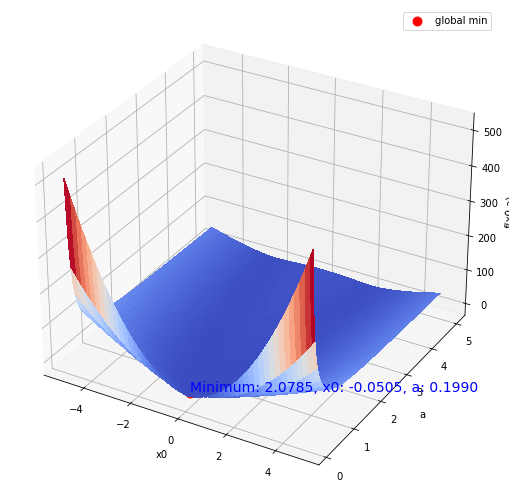

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def f(x0, a):
    return 2*np.sqrt(1+1/a**2)*np.sqrt((x0**2-a)**2+x0**2)

# Define the range for x0 and a
x0_vals = np.linspace(-5, 5, 100)
a_vals = np.linspace(0.1, 5, 100)

X0, A = np.meshgrid(x0_vals, a_vals)
Z = f(X0, A)

# Find the global minimum
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
global_min = Z[min_idx]
global_min_x0 = X0[min_idx]
global_min_a = A[min_idx]

# Plot the function surface
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X0, A, Z, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel('x0')
ax.set_ylabel('a')
ax.set_zlabel('f(x0,a)')

# Plot the global minimum
ax.scatter(global_min_x0, global_min_a, global_min, color='r', s=80, label='global min')
ax.legend()

# Add text annotation to the plot
text = "Minimum: {:.4f}, x0: {:.4f}, a: {:.4f}".format(global_min, global_min_x0, global_min_a)
ax.text(global_min_x0, global_min_a, global_min+5, text,
        color='blue', fontsize=14, zorder=10)


plt.show()
